In [148]:
# Import required modules
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import re
import pprint
import glob
import pickle
import traceback
import logging
import os.path, time
from datetime import datetime, timedelta

# CSV files we have got so far

In [149]:
import os
for index,i in enumerate(sorted(os.listdir("csv/"))):
    print(index,i)

0 Business & entrepreneur.csv
1 Business & entrepreneurAuthors.csv
2 Commercial events.csv
3 Commercial eventsAuthors.csv
4 Complaints corner.csv
5 Complaints cornerAuthors.csv
6 Concerts.csv
7 ConcertsAuthors.csv
8 Education.csv
9 EducationAuthors.csv
10 Employment.csv
11 EmploymentAuthors.csv
12 Entertainment & dining.csv
13 Entertainment & diningAuthors.csv


# Load all data at once

Loading thread text:

In [150]:
dfContainer={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if not os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfContainer[re.sub(r'.csv','',os.path.basename(filename))]=df

# sorted(dataframes)
# dataFrames = pd.Series(dataFrames)
# df=pd.read_csv('Concerts',sep='\t',index_col=0)
# df

# dfContainer
len(dfContainer['Employment'])

6204

In [159]:
dfAuthors={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfAuthors[re.sub(r'.csv','',os.path.basename(filename))]=df
print(filenames,dfAuthors.keys())

dfAuthors['EmploymentAuthors'].head()

['csv/Business & entrepreneurAuthors.csv', 'csv/ConcertsAuthors.csv', 'csv/EducationAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv'] dict_keys(['Business & entrepreneurAuthors', 'EducationAuthors', 'Commercial eventsAuthors', 'ConcertsAuthors', 'Entertainment & diningAuthors', 'Complaints cornerAuthors', 'EmploymentAuthors'])


,date,exp,groaned,location,post,reputation,since,thanked,thread,user_posts
0,"29.09.2009, 22:50",Member,Thanked 75 Times in 47 Posts,Location: Basel,\r\n\t\t\t\r\n\t\t\tJust to reiterate on the ...,earned some respect,Join Date: Aug 2008,Groaned at 0 Times in 0 Posts,How to legally employ a cleaning lady,Posts: 136
1,"15.03.2006, 12:05",Newbie 1st class,Thanked 0 Times in 0 Posts,"Location: Eschenbach, St Gallen","\r\n\t\t\t\r\n\t\t\tAlso, feel free to have a...",no particular reputation at present,Join Date: Mar 2006,Groaned at 0 Times in 0 Posts,[Swiss Job market] English-Speaking Companies,Posts: 21
2,"28.04.2016, 11:12",Commercial paid-placement ads,Thanked 14 Times in 10 Posts,Location: Switzerland,helps you to get noticed by employers! ...,considered a nuisance,Join Date: Jan 2011,Groaned at 5 Times in 4 Posts,Recruiters Advice,Posts: 182
3,"16.04.2011, 11:15",Forum Legend,"Thanked 11,078 Times in 4,137 Posts",Location: ZH,- including sites for jobs for ...,a reputation beyond repute,Join Date: Apr 2008,Groaned at 56 Times in 52 Posts,English speaking companies + Web Sites for job...,"Posts: 7,363"
4,"20.02.2011, 19:53",Forum Legend,"Thanked 11,078 Times in 4,137 Posts",Location: ZH,\n Work Permits for For...,a reputation beyond repute,Join Date: Apr 2008,Groaned at 56 Times in 52 Posts,Salaries in Switzerland - These and other ques...,"Posts: 7,363"


Clean and transform data

In [152]:
# # Casting views from str to int (- to 0 because is a moved)
today=datetime.strptime(time.ctime(os.path.getctime('csv/ConcertsAuthors.csv')),'%a %b %d %H:%M:%S %Y')
yesterday=today- timedelta(days=1)
tdy="%d.%d.%d" %(today.day,today.month,today.year)
ystr="%d.%d.%d" %(yesterday.day,yesterday.month,yesterday.year)

for key in dfContainer:
    dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    dfContainer[key].replies=dfContainer[key].apply(lambda x: int(str(x[2]).replace(',','').replace('-','0')),axis=1)
print(filenames)
for key in dfAuthors:
    dfAuthors[key].user_posts=dfAuthors[key].apply(lambda x: x[9].replace('Posts: ','').replace(',','').replace('-','0') ,axis=1)
#     dfAuthors[key].user_posts=dfAuthors[key].apply(lambda x: (x[9].isalpha() and x[9] or x[9].isdigit() and 
#                                                        int(x[9]) or x[9].np.nan) ,axis=1)
    dfAuthors[key].user_posts=[(x.isdigit() and 
                                int(x) or np.nan)for x in dfAuthors[key]['user_posts']]
    dfAuthors[key].date=dfAuthors[key].apply(lambda x: x[0].replace('null',("1.1.0001"+", 00:00")),axis=1)
    dfAuthors[key].date=dfAuthors[key].apply(lambda x: x[0].replace('Yesterday',ystr),axis=1)
    dfAuthors[key].date=dfAuthors[key].apply(lambda x: x[0].replace('Today',tdy),axis=1)

    dfAuthors[key].date=[datetime.strptime(x, '%d.%m.%Y, %H:%M')for x in dfAuthors[key]['date'] if (x!='null')]
# print(filenames)


['csv/Business & entrepreneurAuthors.csv', 'csv/ConcertsAuthors.csv', 'csv/EducationAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv']


Reputation transformation

In [155]:
dfAuthors['EducationAuthors']['reputation'].unique()
# dfAuthors['EducationAuthors'].head()
d = {}
d["a reputation beyond repute"] = 6 # 
d["an excellent reputation"] = 5 # 
d["considered knowledgeable"] = 4 #
d["earned the respect of many"] = 3 #
d["earned some respect"] = 2#
d["made some interesting contributions"] = 1 #
d["no particular reputation at present"] = 0#1
d["slipped a little"] = -1 #0
d["become a little unpopular"] = -2 #
d["annoyed a few people around here"] = -3 #
d["considered a nuisance"] = -4 #
d["considered unworthy"] = -5 #
d["null"] = np.nan#

# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['reputation']=[d.get(item,item)  for item in dfAuthors[key]['reputation']]
dfAuthors['EducationAuthors'].head()

,date,exp,groaned,location,post,reputation,since,thanked,thread,user_posts
0,2016-12-30 10:18:00,Commercial paid-placement ads,Thanked 14 Times in 10 Posts,Location: Switzerland,As long as you pay for it it won´t be take...,-4.0,Join Date: Jan 2011,Groaned at 5 Times in 4 Posts,Camp Suisse - Adventure and language summer ca...,182.0
1,2016-08-12 09:59:00,Commercial paid-placement ads,Thanked 14 Times in 10 Posts,Location: Switzerland,\nLearn French effectively with Swiss...,-4.0,Join Date: Jan 2011,Groaned at 5 Times in 4 Posts,Swiss French School  The best place to feel ...,182.0
2,2009-04-21 13:58:00,Forum Legend,"Thanked 5,034 Times in 2,432 Posts",Location: From one side of lake Zurich to the ...,Thought I could help out on the equivalents...,6.0,Join Date: May 2008,Groaned at 33 Times in 22 Posts,Childcare and Schooling in Switzerland,5505.0
3,2014-11-26 12:39:00,Commercial paid-placement ads,Thanked 14 Times in 10 Posts,Location: Switzerland,\r\n\t\t\t\r\n\t\t\tacademia International Sc...,-4.0,Join Date: Jan 2011,Groaned at 5 Times in 4 Posts,"academia International School  Pre-School, Pr...",182.0
4,0001-01-01 00:00:00,null,null,null,\r\n\t\t\t\r\n\t\t\tPlease read the following...,NaN,null,null,Read This - About Posting in the Education Forum,NaN


## Join DF

In [5]:
# Next 'if' is for them to have the same order.
if(sum(dfContainer['Employment']['threads']==dfAuthors['EmploymentAuthors']['thread'])==len(dfContainer['Employment']['threads'])):
# We cant merge them with thread as the index because is not unique.
#     result = pd.concat([dfContainer['Employment'], dfAuthors['EmploymentAuthors']], axis=1, join_axes=[dfContainer['Employment'].index])
    result=dfContainer['Employment']
    temp=dfAuthors['EmploymentAuthors'].drop('thread',1)
    result['authors']=[list(temp.values[index]) for index,row in enumerate(result['threads'])]
result.head()


,hrefs,posts,replies,threads,views,authors
0,http://www.englishforum.ch/employment/63046-ho...,\r\n\t\t\t\r\n\t\t\tThanks - this is all real...,19,How to legally employ a cleaning lady,14632,"[29.09.2009, 22:50, Member, Thanked 75 Times i..."
1,http://www.englishforum.ch/employment/324-swis...,\r\n\t\t\t\r\n\t\t\tHi Everyone \r\nPlease ...,453,[Swiss Job market] English-Speaking Companies,336941,"[15.03.2006, 12:05, Newbie 1st class, Thanked ..."
2,http://www.englishforum.ch/employment/253373-r...,helps you to get noticed by employers! ...,0,Recruiters Advice,1282,"[28.04.2016, 11:12, Commercial paid-placement ..."
3,http://www.englishforum.ch/employment/111660-e...,- including sites for jobs for ...,0,English speaking companies + Web Sites for job...,43993,"[16.04.2011, 11:15, Forum Legend, Thanked 11,0..."
4,http://www.englishforum.ch/employment/106945-s...,\n Work Permits for For...,0,Salaries in Switzerland - These and other ques...,52386,"[20.02.2011, 19:53, Forum Legend, Thanked 11,0..."


In [119]:
moreViews=pd.DataFrame()
Views=pd.DataFrame()
viewsStats=pd.DataFrame()
repliesStats=pd.DataFrame()
for key in dfContainer:
#     dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    viewsStats[key]=dfContainer[key].describe()['views']
    repliesStats[key]=dfContainer[key].describe()['replies']
    temp=dfContainer[key][['threads','views']]
    temp2=temp.sort_values('views',ascending=0)[:4]['views']
    temp2.index=[np.arange(4)]
    Views[key]=temp2
    temp=temp.sort_values('views',ascending=0)[:4]
    temp['index2']=key
    temp.index=[temp.index2,temp.threads]
    temp=temp.drop(['index2','threads'],1)
    moreViews=moreViews.append(temp)


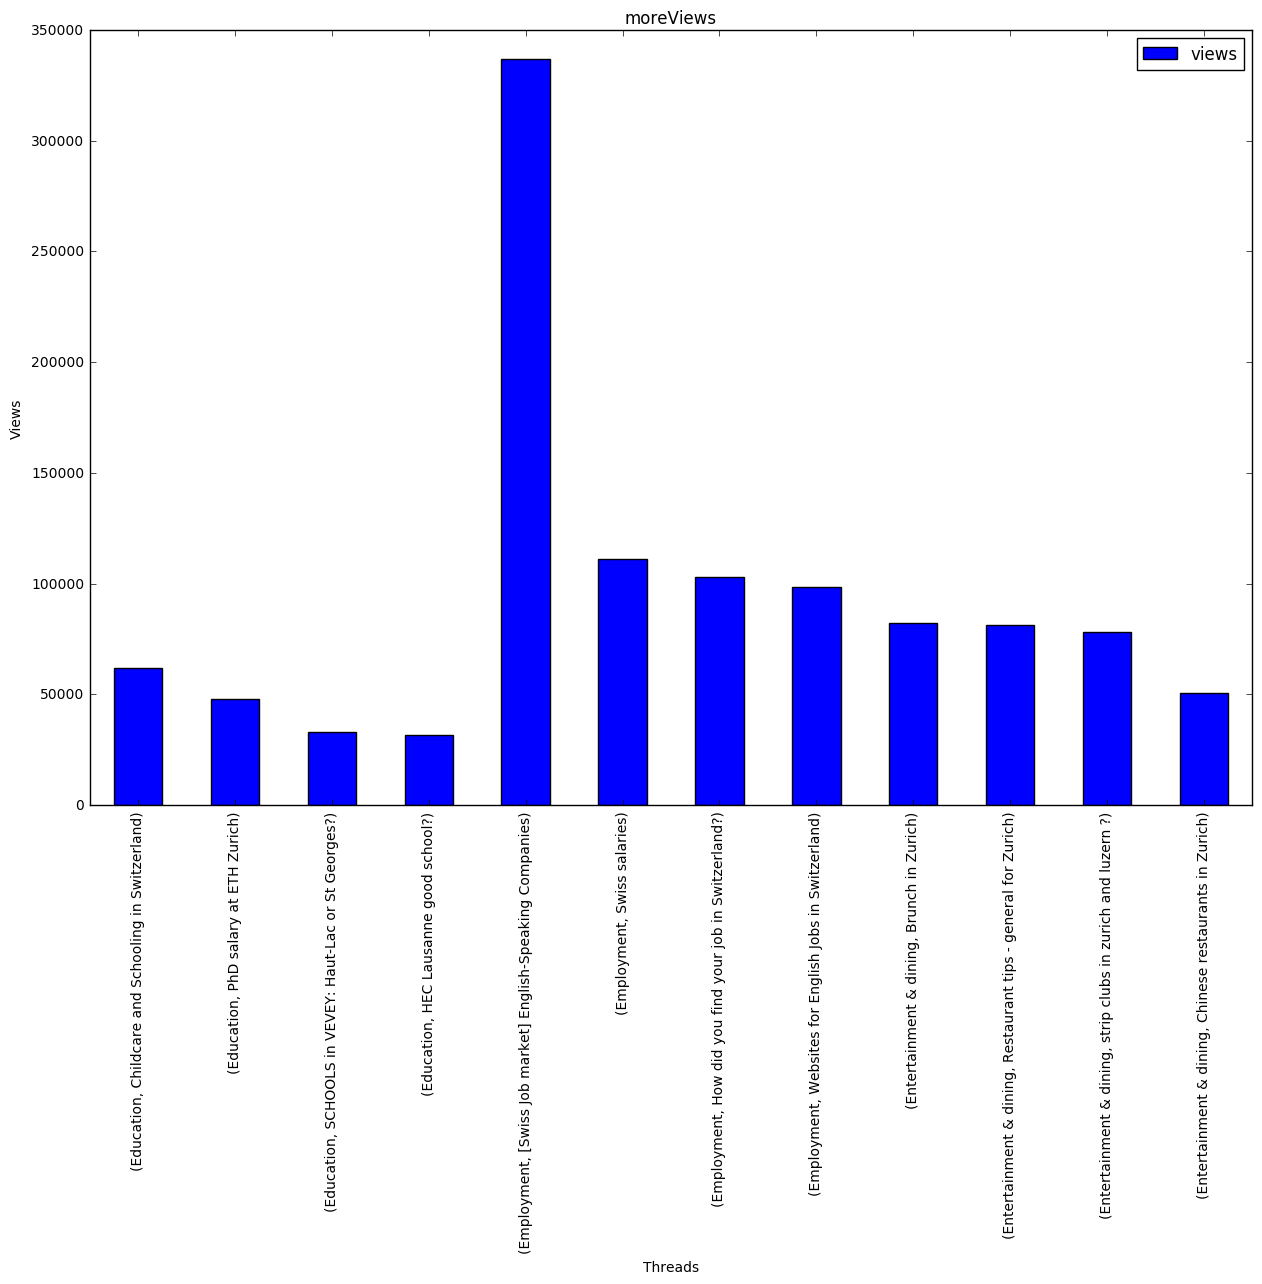

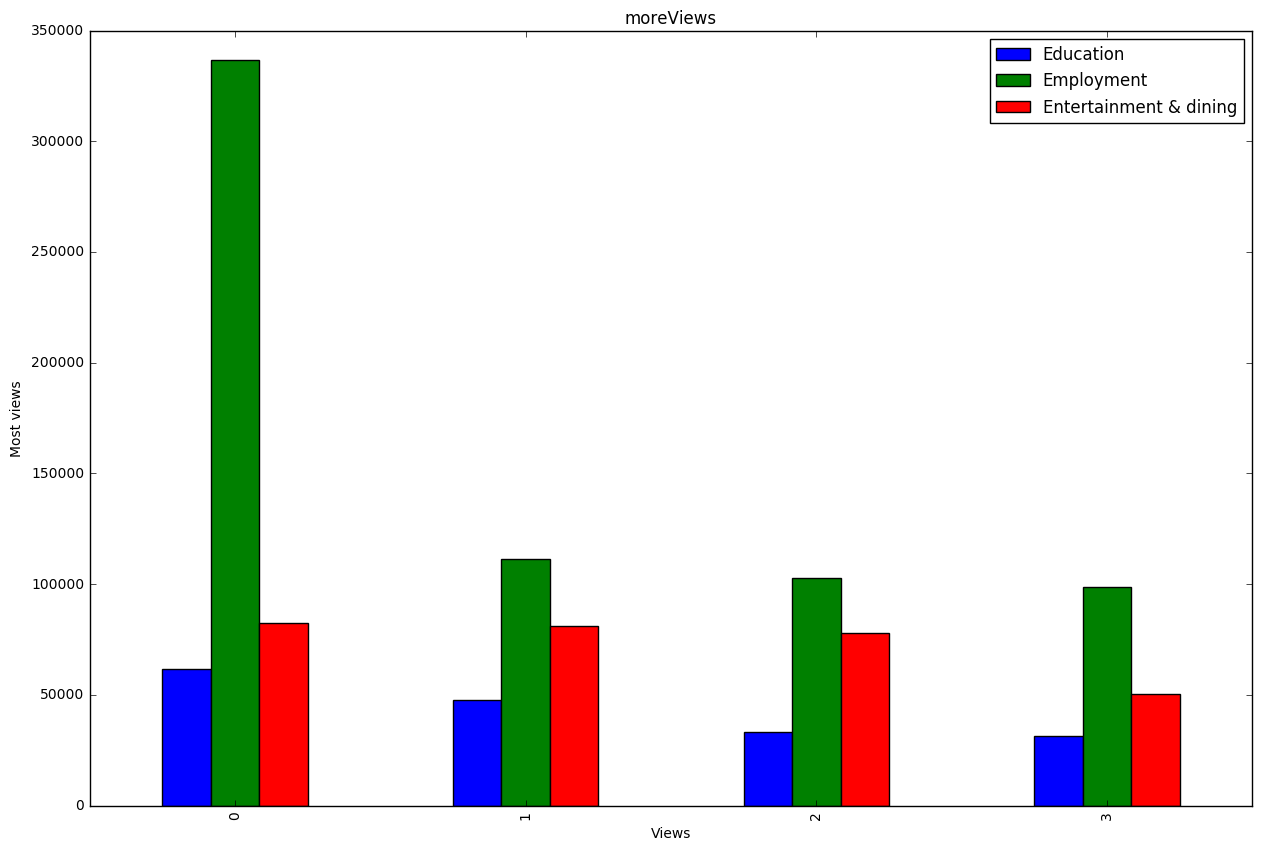

views
index2                 threads                                              
Education              Childcare and Schooling in Switzerland          61820
                       PhD salary at ETH Zurich                        47708
                       SCHOOLS in VEVEY: Haut-Lac or St Georges?       33036
                       HEC Lausanne good school?                       31558
Employment             [Swiss Job market] English-Speaking Companies  336941
                       Swiss salaries                                 111212
                       How did you find your job in Switzerland?      102786
                       Websites for English Jobs in Switzerland        98533
Entertainment & dining Brunch in Zurich                                82323
                       Restaurant tips - general for Zurich            81139
                       strip clubs in zurich and luzern ?              77921
                       Chinese restaurants in Zurich                   50479

In [22]:
# temp=dfContainer['Business & entrepreneur'][['threads','views']]
# temp=temp.sort_values('views',ascending=0)
# temp2=temp[:3].append(temp[3:4])
# temp2['index2']='a'
# temp2.index=[temp2.index2,np.arange(4)]
# temp2.drop('index2',1)
# temp3=temp[4:8]
# temp3['index2']='b'
# temp3.index=[temp3.index2,np.arange(4)]
# temp2.append(temp3)
moreViews.plot.bar(figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Threads')
plt.ylabel('Views')
Views.plot(kind='bar',figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Views')
plt.ylabel('Most views')
plt.show()
Views
moreViews

In [23]:
viewsStats

,Education,Employment,Entertainment & dining
count,1337.000000,6204.000000,1729.000000
mean,1860.722513,2877.397485,3309.094853
std,2989.543913,6444.963953,5274.950972
min,0.000000,0.000000,0.000000
25%,842.000000,1044.000000,1141.000000
50%,1223.000000,1616.500000,1799.000000
75%,1879.000000,2883.000000,3391.000000
max,61820.000000,336941.000000,82323.000000


In [24]:
repliesStats

,Education,Employment,Entertainment & dining
count,1337.000000,6204.000000,1729.000000
mean,9.132386,11.860574,10.812608
std,15.914714,19.089455,21.565003
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000
50%,4.000000,6.000000,4.000000
75%,10.000000,14.000000,11.000000
max,280.000000,453.000000,320.000000


# Obj Saver
This will be excluded from GitHub beacuse of the objs sizes.

In [25]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## WordCloud

In [28]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk as nltk
stop = set(stopwords.words('english'))
stop.update([".",",","?",")","(",":","/","!","%","-",""])
stop.update(STOPWORDS)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
wnl = WordNetLemmatizer()
forumTextContainer={}
i=0
for key in dfContainer:
    temp=dfContainer[key]
    lista=[]
    print(i)
    print("There are %s null values" %temp.isnull().values.sum())
    temp=temp.dropna()
    for thread in (temp.values):
        allwords=[]
#         if not type(thread[1])==float: # moved thread or privated
        text_tk = nltk.word_tokenize(thread[1]) 
        word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
        for wt in word_tag_fd:
            if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ'):
                allwords.append(wnl.lemmatize(wt[0]))
            elif (wt[0] not in stop) and (wt[1] == 'VERB'):
                allwords.append(wnl.lemmatize(wt[0],'v'))
                        
#         allwords=[wnl.lemmatize(wt[0]) for wt in word_tag_fd if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ')]
          
    #         allnoun=[wt[0] for wt in word_tag_fd if (wt[1] == 'NOUN' and wt[0] not in stop)] 
    #         # We want to do a wordcloud just of the nouns
    #         allverb=[wt[0] for wt in word_tag_fd if (wt[1] == 'VERB'and wt[0] not in stop)]
        lista.append((thread[3],allwords))
           
    forumTextContainer[key]=(lista)
    i+=1
# print(temp.loc[2].threads)
# word_c=WordCloud()
# wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allnoun).str.cat(sep=' '))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
save_obj(forumTextContainer, 'forumTextContainer') 



0
There are 1 null values
1
There are 1 null values
2
There are 0 null values


FileNotFoundError: [Errno 2] No such file or directory: 'obj/forumTextContainer.pkl'

## Loading TK

In [30]:
# Loading threads tk
forumTextContainer=load_obj('forumTextContainer')

In [62]:
forumTextContainer['Education'][0]

('Camp Suisse - Adventure and language summer camps and school trips',
 ['offer',
  'exciting',
  'adventure',
  'holiday',
  'kid',
  'young',
  'adult',
  '7-17',
  'corner',
  'globe',
  'challenge',
  'fulfil',
  'experience',
  'combine',
  'language',
  'sport',
  'adventure',
  'education',
  'friendship',
  'culturally',
  'diverse',
  'international',
  'environment',
  'Guests',
  'learn',
  'new',
  'skill',
  'sport',
  'participate',
  'outdoor',
  'pursuit',
  'adventure',
  'learn',
  'improve',
  'language',
  'skill',
  'Swiss',
  'culture',
  'make',
  'new',
  'friend',
  'take',
  'place',
  'structured',
  'organised',
  'safe',
  'supervise',
  'set',
  'help',
  'guidance',
  'support',
  'friendship',
  'experienced',
  'camp',
  'staff',
  'welcome',
  'different',
  'nationality',
  'create',
  'truly',
  'international',
  'experience',
  'take',
  'camper',
  'session',
  'English-speaking',
  'camp',
  'offer',
  'language',
  'tuition',
  'French',
  'Germ